## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

Blog post of the final project report can be found at: https://zihengpa.medium.com/final-project-selecting-models-to-predict-chd-d78e2fa9010b 

The link to my github repo: https://github.com/ziheng-pan/Final-Project-Selecting-Models-to-Predict-CHD


The dataset is found at https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset, which is from a cardiovascular study on residents of the town of Framingham, Massachusetts. The goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).

Variables:

male: whether the patient is male

age: age of the patient

education: education level of the patient

currentSmoker: whether or not the patient is a current smoker

cigsPerDay: the number of cigarettes that the person smoked on average in one day

BPMeds: whether or not the patient was on blood pressure medication

prevalentStroke: whether or not the patient had previously had a stroke

prevalentHyp: whether or not the patient was hypertensive

diabetes: whether or not the patient had diabetes

totChol: total cholesterol level

sysBP: systolic blood pressure

diaBP: diastolic blood pressure

BMI: Body Mass Index

heartRate: heart rate

glucose: glucose level

TenYearCHD: 10 year risk of coronary heart disease CHD (target variable, "1" means "yes")


In [235]:
# import all the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)

# import the dataset
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_handle = drive.CreateFile({'id': '1hZvHb3rQZgNfbEiaAUSKDn3n-TMvpRaP'})  
file_handle.GetContentFile('framingham.csv')


In [236]:
# read the dataset 
pd.set_option('display.max_columns', 100)
data = pd.read_csv('framingham.csv')
print(data.head())

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

In [237]:
# clease the dataset
print(data.isnull().sum())
data_cleansed = data.dropna(axis=0)
print(data_cleansed.isnull().sum())

# normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedData = scaler.fit_transform(data_cleansed)
cols = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
normalizedData = pd.DataFrame(normalizedData, columns=cols)
normalizedData['TenYearCHD'] = normalizedData['TenYearCHD'].astype(int)
print(normalizedData.head())


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64
   male       age  education  currentSmoker  cigsPerDay  BPMeds  \
0   1.0  0.184211   1.000000            0.0    0.000000     0.0   
1   0.0  0.368421   0.333333            0.0    0.000000     0.0   
2   1.0  0.421053   0.000000            1.0    0.285714     0.0   
3 

In [238]:
# Split the data into test and training data with test size 30%, random state = 42
x = normalizedData.iloc[:, :-1]
y = normalizedData['TenYearCHD']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state=42, stratify=y)

dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(xTrain,yTrain)

# Compute the baseline classification accuracy for xTrain
baseline_acc = dummy_classifier.score(xTest,yTest)
print("Baseline Accuracy = ", baseline_acc)


Baseline Accuracy =  0.8479052823315119


Accuracy =  0.8588342440801457
[[925   6]
 [149  18]]


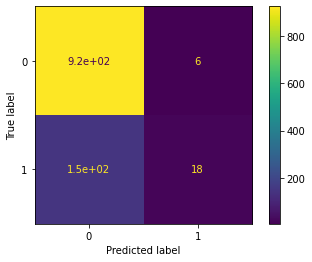

In [239]:
# Perform a logistic regression model
model_logistic = LogisticRegression(penalty='none', random_state=42)
model_logistic.fit(xTrain, yTrain)
y_pred = model_logistic.predict(xTest)
acc_logistic = accuracy_score(yTest, y_pred)
print('Accuracy = ', acc_logistic)

# the confusion matrix
cnf_matrix = metrics.confusion_matrix(yTest, y_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(model_logistic, xTest, yTest)
plt.show()

Accuracy =  0.8460837887067395
[[920  11]
 [158   9]]


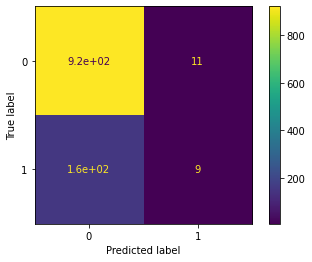

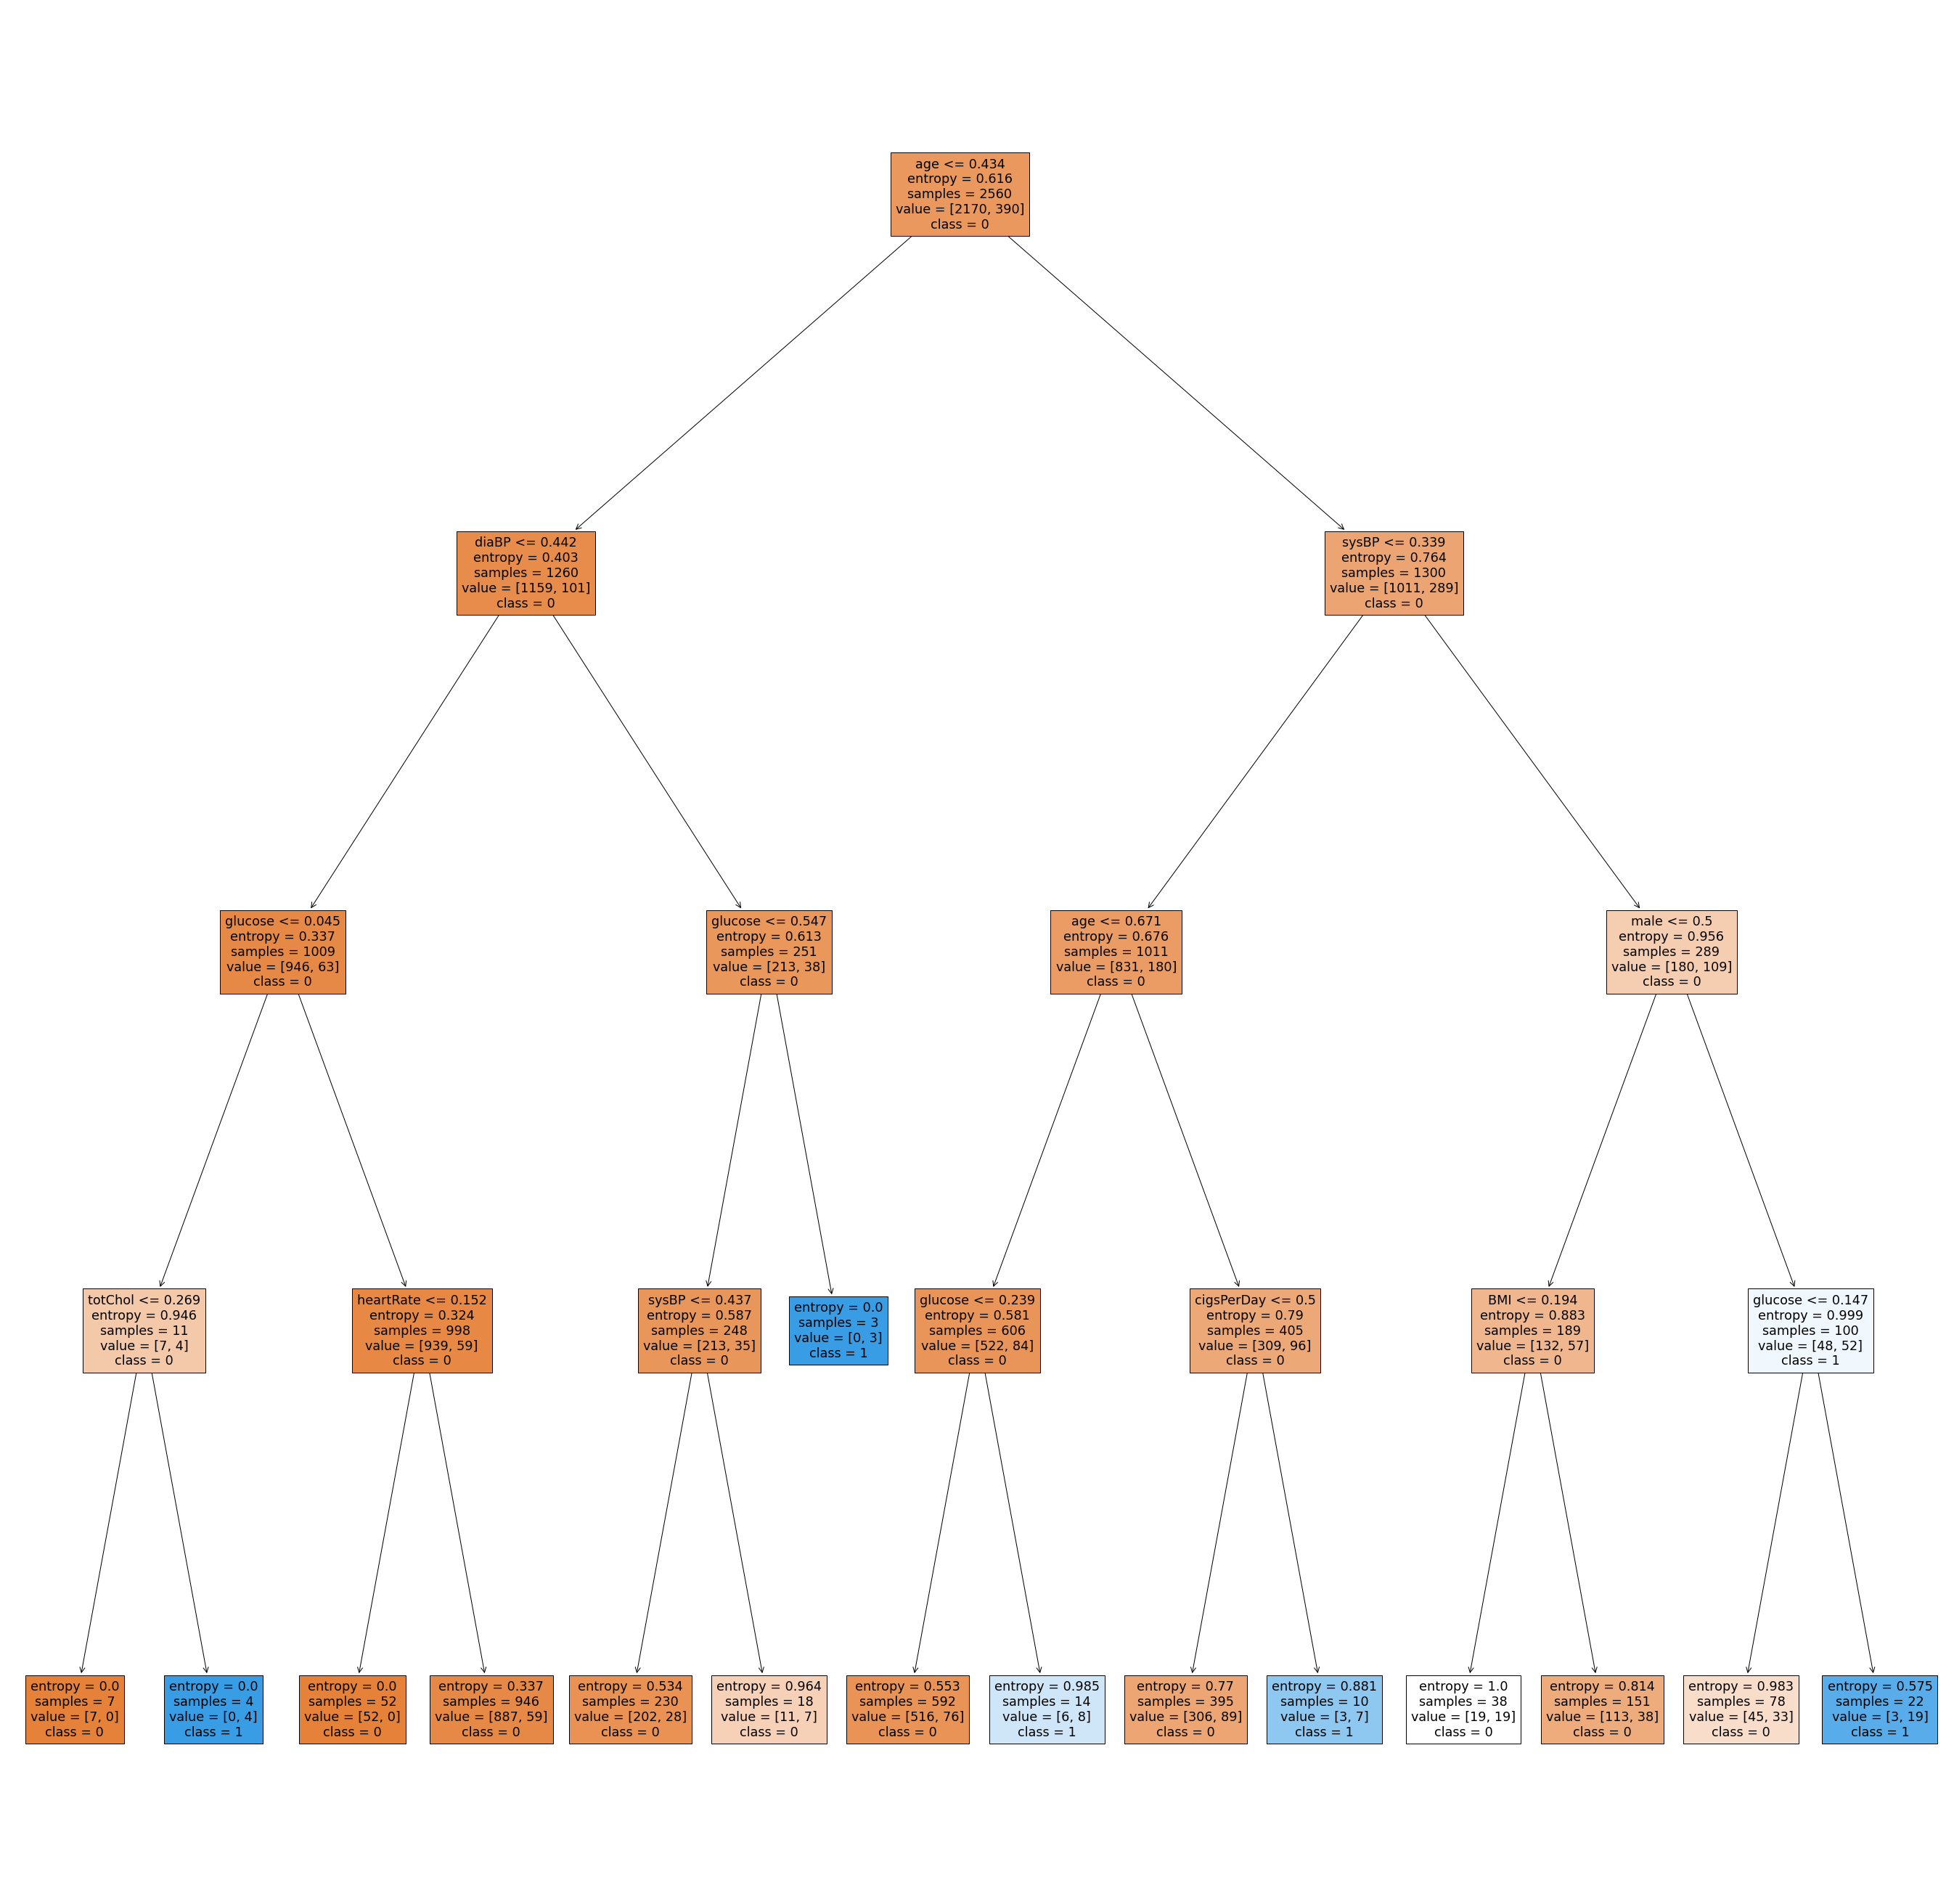

<bound method DataFrame.nlargest of            features  importance
0              male    0.044467
1               age    0.405483
2         education    0.000000
3     currentSmoker    0.000000
4        cigsPerDay    0.033392
5            BPMeds    0.000000
6   prevalentStroke    0.000000
7      prevalentHyp    0.000000
8          diabetes    0.000000
9           totChol    0.048822
10            sysBP    0.185590
11            diaBP    0.063012
12              BMI    0.028308
13        heartRate    0.022054
14          glucose    0.168871>
The top three most important features are: age , sysBP , glucose


In [240]:
# Build a classification tree
model_dt = DecisionTreeClassifier(max_depth=4, criterion="entropy", random_state=42)
model_dt.fit(xTrain,yTrain)
yPred_dt = model_dt.predict(xTest)
acc_dt = accuracy_score(yTest, yPred_dt)
print('Accuracy = ', acc_dt)

# the confusion matrix
cnf_matrix = metrics.confusion_matrix(yTest, yPred_dt)
print(cnf_matrix)
metrics.plot_confusion_matrix(model_dt, xTest, yTest)
plt.show()

# show the classification tree
fn = x.columns
plt.figure(figsize=(48,48))
classList = list(map(str,model_dt.classes_.tolist()))
a = tree.plot_tree(model_dt, feature_names=fn, class_names=classList, filled=True)
plt.show()

# Find and print the top three most important features in the decision tree model for determining CHD 
feature_importances = model_dt.feature_importances_
features = xTrain.columns
df1 = pd.DataFrame({'features': features, 'importance': feature_importances}).nlargest
print(df1)
idx = (-feature_importances).argsort()[:3]
columns = x.columns[idx]
print("The top three most important features are:", columns[0], ",", columns[1], ",", columns[2])

In [241]:
# Build a generic Bagging ensemble and print the accuracy
model_bagging = BaggingClassifier(random_state = 42)
model_bagging.fit(xTrain, yTrain)
pred_bagging = model_bagging.predict(xTest)
acc_bagging = accuracy_score(yTest, pred_bagging)
print('Accuracy = ', acc_bagging)


Accuracy =  0.8360655737704918


In [242]:
# Build a Random Forest model and print the accuracy
model_rf = RandomForestClassifier(n_estimators=100, max_features=7, random_state=42)
model_rf.fit(xTrain, yTrain)
predict_rf = model_rf.predict(xTest)
accuracy_rf = accuracy_score(yTest, predict_rf)
print('Accuracy = ', accuracy_rf)

# Find and print the top three most important features in the Random Forest model for determining CHD 
feature_importances_rf = model_rf.feature_importances_
features = xTrain.columns
df2 = pd.DataFrame({'features': features, 'importance': feature_importances_rf}).nlargest
print(df2)
idx = (-feature_importances_rf).argsort()[:3]
columns = x.columns[idx]
print("The top three most important features are:", columns[0], ",", columns[1], ",", columns[2])

Accuracy =  0.8442622950819673
<bound method DataFrame.nlargest of            features  importance
0              male    0.021278
1               age    0.118752
2         education    0.032150
3     currentSmoker    0.010235
4        cigsPerDay    0.049643
5            BPMeds    0.006358
6   prevalentStroke    0.002881
7      prevalentHyp    0.015103
8          diabetes    0.003505
9           totChol    0.127100
10            sysBP    0.146906
11            diaBP    0.116525
12              BMI    0.133575
13        heartRate    0.095926
14          glucose    0.120062>
The top three most important features are: sysBP , BMI , totChol


In [243]:
# Build an AdaBoost model and print the accuracy
base_est = DecisionTreeClassifier(max_depth=4)
ada_boost = AdaBoostClassifier(base_est, n_estimators=200, random_state=42, learning_rate=.05)
ada_boost.fit(xTrain, yTrain)
ada_boost_pred = ada_boost.predict(xTest)
accuracy_ada_boost = accuracy_score(yTest, ada_boost_pred)
print('Accuracy = ', accuracy_ada_boost)

# Find and print the top three most important features in the AdaBoost model for determining CHD
feature_importances_ada_boost = ada_boost.feature_importances_
features = xTrain.columns
df3 = pd.DataFrame({'features': features, 'importance': feature_importances_ada_boost}).nlargest
print(df3)
idx = (-feature_importances_ada_boost).argsort()[:3]
columns = x.columns[idx]
print("The top three most important features are:", columns[0], ",", columns[1], ",", columns[2])

Accuracy =  0.8406193078324226
<bound method DataFrame.nlargest of            features  importance
0              male    0.022730
1               age    0.123757
2         education    0.027696
3     currentSmoker    0.000955
4        cigsPerDay    0.045701
5            BPMeds    0.001795
6   prevalentStroke    0.000000
7      prevalentHyp    0.011426
8          diabetes    0.000837
9           totChol    0.181020
10            sysBP    0.125334
11            diaBP    0.109823
12              BMI    0.150305
13        heartRate    0.087638
14          glucose    0.110982>
The top three most important features are: totChol , BMI , sysBP


In [244]:
# Voting: Using a voting classifier, build an ensemble of RandomForestClassifier, DecisionTreeClassifier, Support Vector Machine and Logistic Regression
rfClf = RandomForestClassifier(max_depth=4, n_estimators=200) 
dtClf = DecisionTreeClassifier(max_depth=4)
svmClf = SVC(probability=True)
logClf = LogisticRegression()
votingClf = VotingClassifier(estimators = [('rf',rfClf), ('dt',dtClf), ('svm',svmClf), ('log', logClf)], voting='soft')
votingClf.fit(xTrain, yTrain)
votingClf_pred = votingClf.predict(xTest)
acc_voting = accuracy_score(yTest, votingClf_pred)
print('Accuracy =', acc_voting)

Accuracy = 0.8497267759562842


In [245]:
# Build a Neural Network and print the accuracy
mlp = MLPClassifier(hidden_layer_sizes=(15,), max_iter=1000, random_state=42)
mlp.fit(xTrain, yTrain)
mlp_pred = mlp.predict(xTest)
acc_mlp = accuracy_score(yTest, mlp_pred)
print('Accuracy =', acc_mlp)

# The confusion matrix
print(metrics.confusion_matrix(mlp_pred, yTest))

# The classification report
print(metrics.classification_report(mlp_pred, yTest))

Accuracy = 0.8597449908925319
[[925 148]
 [  6  19]]
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1073
           1       0.11      0.76      0.20        25

    accuracy                           0.86      1098
   macro avg       0.55      0.81      0.56      1098
weighted avg       0.97      0.86      0.91      1098



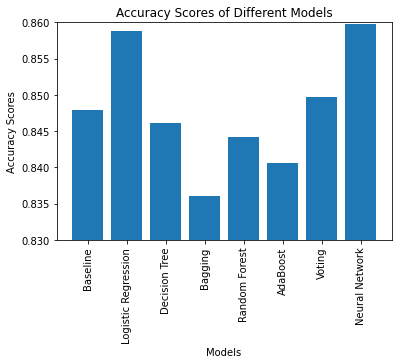

In [246]:
d = [baseline_acc, acc_logistic, acc_dt, acc_bagging, accuracy_rf, accuracy_ada_boost, acc_voting, acc_mlp]
acc_scores = pd.Series(data=d, index=['Baseline','Logistic Regression','Decision Tree','Bagging','Random Forest','AdaBoost','Voting','Neural Network'])
plt.bar(acc_scores.index,acc_scores)
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Scores of Different Models')
plt.ylim([0.83,0.86])
plt.xticks(rotation=90)
plt.show()

The Neural Network model displays the highest accuracy score. Therefore, select it as the most promising model. 


In [247]:
# Adjust the Neural Network model's parameters
mlp_adjusted = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(15,), max_iter=1000)
mlp_adjusted.fit(xTrain, yTrain)
mlp_adjusted_pred = mlp_adjusted.predict(xTest)
acc_mlp_adjusted = accuracy_score(yTest, mlp_adjusted_pred)
print('Accuracy =', acc_mlp_adjusted)

Accuracy = 0.8542805100182149


In [248]:
import torch.nn as nn
import torch
import torch.nn.functional as F

model = torch.nn.Sequential(
    nn.Linear(15, 5),
    nn.ReLU(),
    nn.Linear(5, 5),
    nn.ReLU(),
    nn.Linear(5, 1)
)

# Simplify the model using dropout
model_dropout = nn.Sequential(
    nn.Linear(15, 5),
    nn.Dropout(0.1), 
    nn.ReLU(),
    torch.nn.Linear(5,5),
    torch.nn.Dropout(0.1), 
    torch.nn.ReLU(),
    torch.nn.Linear(5, 1),
) 

opt = torch.optim.Adam(model.parameters(), lr=0.00001)
opt_dropout = torch.optim.Adam(model.parameters(), lr=0.00001)
loss_fn = torch.nn.MSELoss()

tensor_x_train = torch.Tensor(xTrain.values)
tensor_y_train = torch.Tensor(yTrain.values)
tensor_x_test = torch.Tensor(xTest.values)
tensor_y_test = torch.Tensor(yTest.values)
                                                             
max_epochs = 1000

for epoch in range(max_epochs):
    
    pred = model(tensor_x_train) 
    loss = loss_fn(pred, tensor_y_train)
    opt.zero_grad()
    loss.backward()
    opt.step() 

    pred_dropout = model_dropout(tensor_x_train)
    loss_dropout = loss_fn(pred_dropout, tensor_y_train)
    opt_dropout.zero_grad()
    loss_dropout.backward()
    opt_dropout.step() 
    
    if epoch % 50 == 0:
        
        model.eval()
        model_dropout.eval()
        
        test_pred = model(tensor_x_test)
        test_loss = loss_fn(test_pred, tensor_y_test)
        
        test_pred_dropout = model_dropout(tensor_x_test)
        test_loss_dropout = loss_fn(test_pred_dropout, tensor_y_test)
        
        print('Epoch %d, Loss = %0.4f, Loss with dropout = %0.4f' % (epoch, test_loss, test_loss_dropout))
        model.train()
        model_dropout.train()



        

Epoch 0, Loss = 0.2383, Loss with dropout = 0.1498


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([2560])) that is different to the input size (torch.Size([2560, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1098])) that is different to the input size (torch.Size([1098, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 50, Loss = 0.2371, Loss with dropout = 0.1498
Epoch 100, Loss = 0.2359, Loss with dropout = 0.1498
Epoch 150, Loss = 0.2347, Loss with dropout = 0.1498
Epoch 200, Loss = 0.2336, Loss with dropout = 0.1498
Epoch 250, Loss = 0.2325, Loss with dropout = 0.1498
Epoch 300, Loss = 0.2313, Loss with dropout = 0.1498
Epoch 350, Loss = 0.2302, Loss with dropout = 0.1498
Epoch 400, Loss = 0.2291, Loss with dropout = 0.1498
Epoch 450, Loss = 0.2281, Loss with dropout = 0.1498
Epoch 500, Loss = 0.2270, Loss with dropout = 0.1498
Epoch 550, Loss = 0.2260, Loss with dropout = 0.1498
Epoch 600, Loss = 0.2249, Loss with dropout = 0.1498
Epoch 650, Loss = 0.2239, Loss with dropout = 0.1498
Epoch 700, Loss = 0.2229, Loss with dropout = 0.1498
Epoch 750, Loss = 0.2219, Loss with dropout = 0.1498
Epoch 800, Loss = 0.2209, Loss with dropout = 0.1498
Epoch 850, Loss = 0.2199, Loss with dropout = 0.1498
Epoch 900, Loss = 0.2189, Loss with dropout = 0.1498
Epoch 950, Loss = 0.2180, Loss with dropout = 0